### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



###Comprobamos la informacion

In [ ]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


Importamos las librerias que vamos a usar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from urllib.request import urlopen
from collections import defaultdict
import seaborn as sns
import geopandas as gpd
import folium
from shapely.geometry import Point

Hacemos un analisis de el total de ventas por cada tienda

###Metodo 1

In [ ]:
# Ingreso total por tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Resultado de Total de ventas
print(f'ingreso total Tienda 1: ${ingreso_tienda1:,.2f}')
print(f'ingreso total Tienda 2: ${ingreso_tienda2:,.2f}')
print(f'ingreso total Tienda 3: ${ingreso_tienda3:,.2f}')
print(f'ingreso total Tienda 4: ${ingreso_tienda4:,.2f}')

ingreso total Tienda 1: $1,150,880,400.00
ingreso total Tienda 2: $1,116,343,500.00
ingreso total Tienda 3: $1,098,019,600.00
ingreso total Tienda 4: $1,038,375,700.00


###Metodo 2

In [ ]:
#Diccionario para cada tienda

tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

#Ingreso total por cada tienda

ingresos_por_tienda = {}

for nombre_tienda, df in tiendas.items():
  if 'Precio' in df.columns:

    df['Precio'] = pd.to_numeric(df['Precio'])

    Facturacion = (sum (df['Precio']))

    print (f"La facturación de {nombre_tienda} es de: COP {Facturacion:,.2f}")
    ingresos_por_tienda[nombre_tienda] = Facturacion


La facturación de Tienda 1 es de: COP 1,150,880,400.00
La facturación de Tienda 2 es de: COP 1,116,343,500.00
La facturación de Tienda 3 es de: COP 1,098,019,600.00
La facturación de Tienda 4 es de: COP 1,038,375,700.00


###Grafico de barras

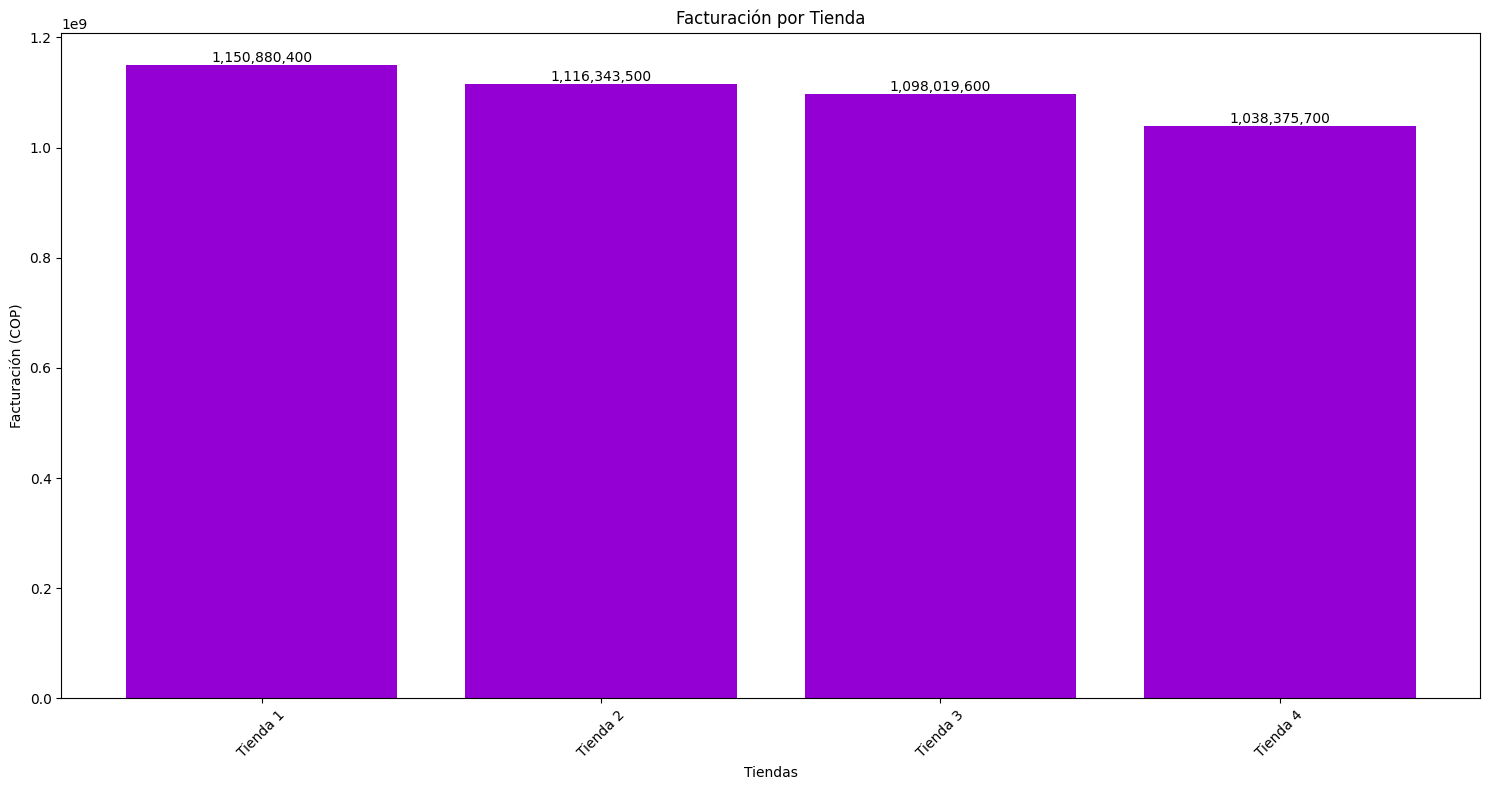

In [ ]:
def grafico_barras():
    barras = list(ingresos_por_tienda.keys())
    valores = list(ingresos_por_tienda.values())

    plt.figure(figsize=(15, 8))
    bars = plt.bar(barras, valores, color='darkviolet')
    plt.ylabel('Facturación (COP)')
    plt.xlabel('Tiendas')
    plt.title('Facturación por Tienda')

    # Etiquetas encima de cada barra
    plt.bar_label(bars, labels=[f'{v:,.0f}' for v in valores], label_type='edge')
    plt.xticks(rotation=45)  # Opcional: girar etiquetas si hay muchas tiendas

    plt.tight_layout()
    plt.show()

grafico_barras()

# 2. Ventas por categoría

###Calcularemos las ventas por categoria, y lo previsualizaremos

In [ ]:
#Calcular las ventas por categoria
ventas_por_categoria = {}
for nombre, df in tiendas.items():
    if 'Categoría del Producto' in df.columns:
        ventas = df['Categoría del Producto'].value_counts()
        ventas_por_categoria[nombre] = ventas

# Convertir a DataFrame para visualización
df_ventas = pd.DataFrame(ventas_por_categoria).fillna(0).astype(int)

# Mostrar tabla
print(df_ventas)


                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480


Creamos un grafico para visualizarlo mejor

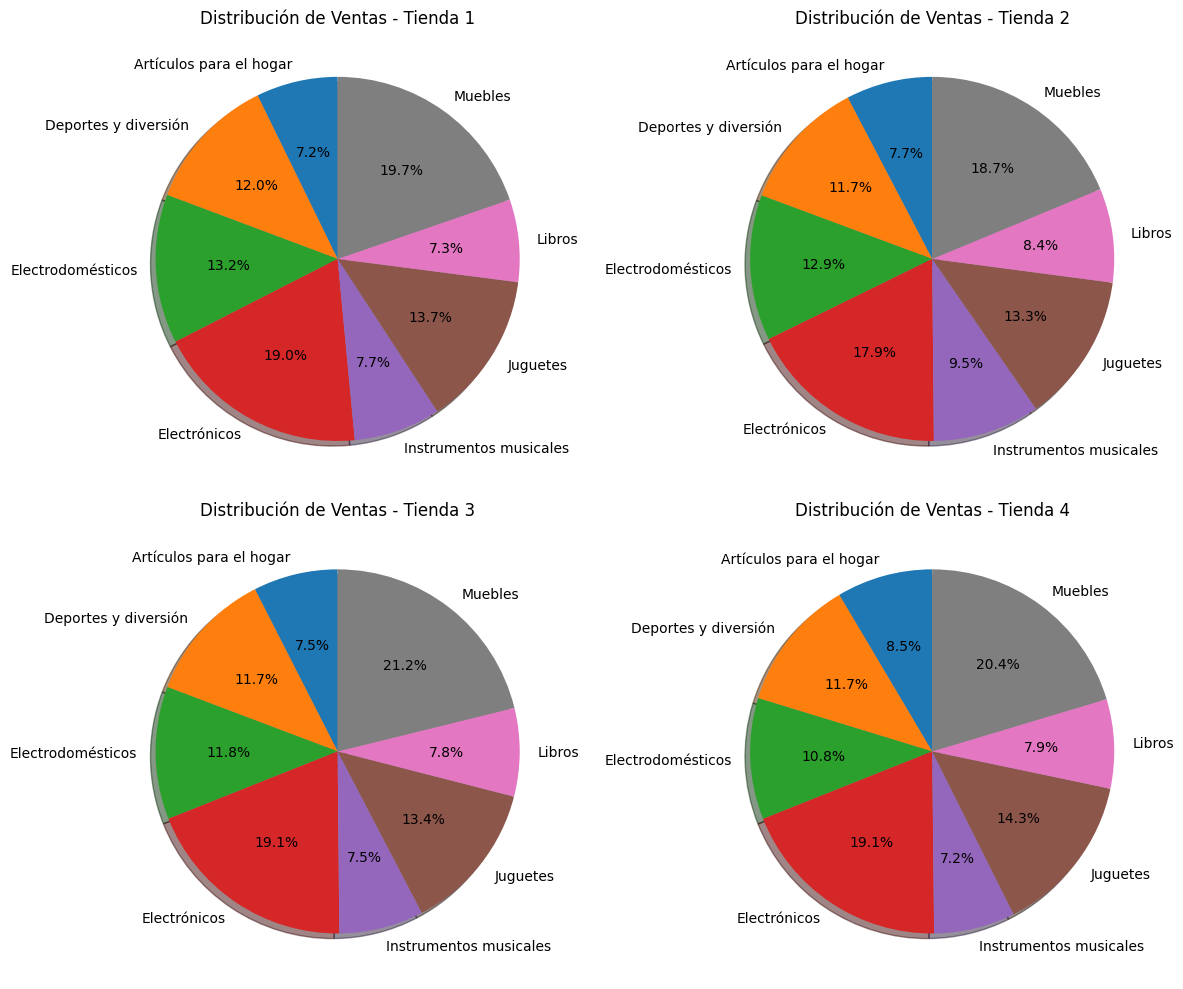

In [ ]:
# Crear figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Para iterar fácilmente

# Iterar sobre cada tienda y graficar
for i, tienda in enumerate(df_ventas.columns):
    axs[i].pie(
        df_ventas[tienda],
        labels=df_ventas.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True
    )
    axs[i].set_title(f'Distribución de Ventas - {tienda}')

# Ajustar espacio
plt.tight_layout()
plt.show()

In [ ]:
tiendas = {
    "Tienda 1": tienda,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}
mayor_categoria_ventas = {}
menor_categoria_ventas = {}

def categorias_ventas ():
    for nombre_tienda, ventas in ventas_por_categoria.items():

      mayor_categoria_ventas[nombre_tienda] = ventas.idxmax()
      menor_categoria_ventas[nombre_tienda] = ventas.idxmin()
      print(f"La categoría con mayor venta en {nombre_tienda} es: {mayor_categoria_ventas[nombre_tienda]}")
      print(f"La categoría con menor venta en {nombre_tienda} es: {menor_categoria_ventas[nombre_tienda]}\n")

categorias_ventas()



La categoría con mayor venta en Tienda 1 es: Muebles
La categoría con menor venta en Tienda 1 es: Artículos para el hogar

La categoría con mayor venta en Tienda 2 es: Muebles
La categoría con menor venta en Tienda 2 es: Artículos para el hogar

La categoría con mayor venta en Tienda 3 es: Muebles
La categoría con menor venta en Tienda 3 es: Instrumentos musicales

La categoría con mayor venta en Tienda 4 es: Muebles
La categoría con menor venta en Tienda 4 es: Instrumentos musicales



Creamos grafico de barras


# 3. Calificación promedio de la tienda


In [ ]:
# Leer los archivos CSV directamente en variables separadas
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Ahora puedes calcular la calificación promedio
calif_tienda1 = tienda1['Calificación'].mean()
calif_tienda2 = tienda2['Calificación'].mean()
calif_tienda3 = tienda3['Calificación'].mean()
calif_tienda4 = tienda4['Calificación'].mean()

print(f"La calificación promedio de la tienda 1 es: {calif_tienda1:.2f}")
print(f"La calificación promedio de la tienda 2 es: {calif_tienda2:.2f}")
print(f"La calificación promedio de la tienda 3 es: {calif_tienda3:.2f}")
print(f"La calificación promedio de la tienda 4 es: {calif_tienda4:.2f}")


La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


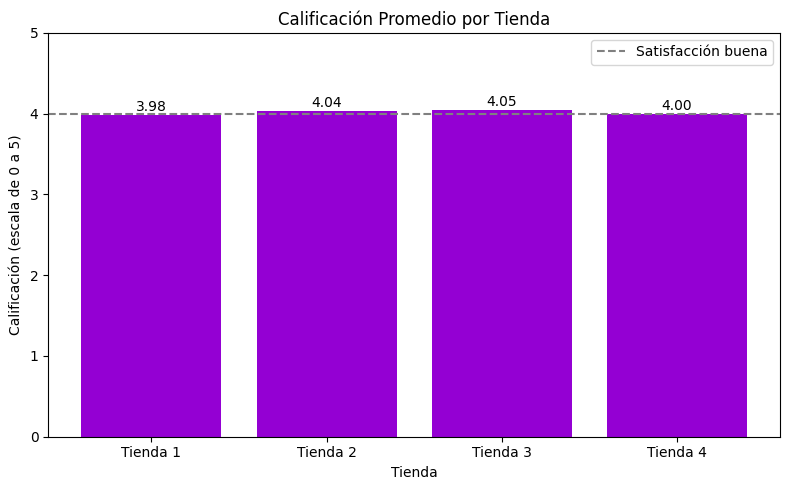

In [ ]:
# Nombres de las tiendas y sus calificaciones promedio
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [calif_tienda1, calif_tienda2, calif_tienda3, calif_tienda4]

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, calificaciones, color='darkviolet')

# Personalizar
plt.ylim(0, 5)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación (escala de 0 a 5)')
plt.axhline(4, color='gray', linestyle='--', label='Satisfacción buena')
plt.legend()

# Etiquetas encima de cada barra
for i, valor in enumerate(calificaciones):
    plt.text(i, valor + 0.05, f'{valor:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Función para calcular Top 3 más y menos dinero generado
def top_productos(datos_tienda, tienda_numero):
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        ingreso_por_producto[producto] += precio

    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MÁS dinero generaron:")
    for producto, ingreso in top_mas_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:,.2f}")

    print(f"\nTienda {tienda_numero} - TOP 3 productos que MENOS dinero generaron:")
    for producto, ingreso in top_menos_vendidos:
        print(f"  {producto} - Ingresos: ${ingreso:,.2f}")

# Ejecución (asegúrate de tener definida la lista `urls` con las URLs de tus CSVs)
for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    top_productos(datos_tienda, i)


Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  TV LED UHD 4K - Ingresos: $142,150,200.00
  Refrigerador - Ingresos: $112,143,300.00
  Iphone 15 - Ingresos: $97,902,200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $696,900.00
  Dinosaurio Rex - Ingresos: $688,900.00
  Cuerda para saltar - Ingresos: $652,800.00

Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113,225,800.00
  TV LED UHD 4K - Ingresos: $103,375,000.00
  Refrigerador - Ingresos: $97,632,500.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $856,900.00
  Dinosaurio Rex - Ingresos: $770,300.00
  Cubo mágico 8x8 - Ingresos: $643,600.00

Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Refrigerador - Ingresos: $99,889,700.00
  TV LED UHD 4K - Ingresos: $96,669,100.00
  Iphone 15 - Ingresos: $93,225,700.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $853,

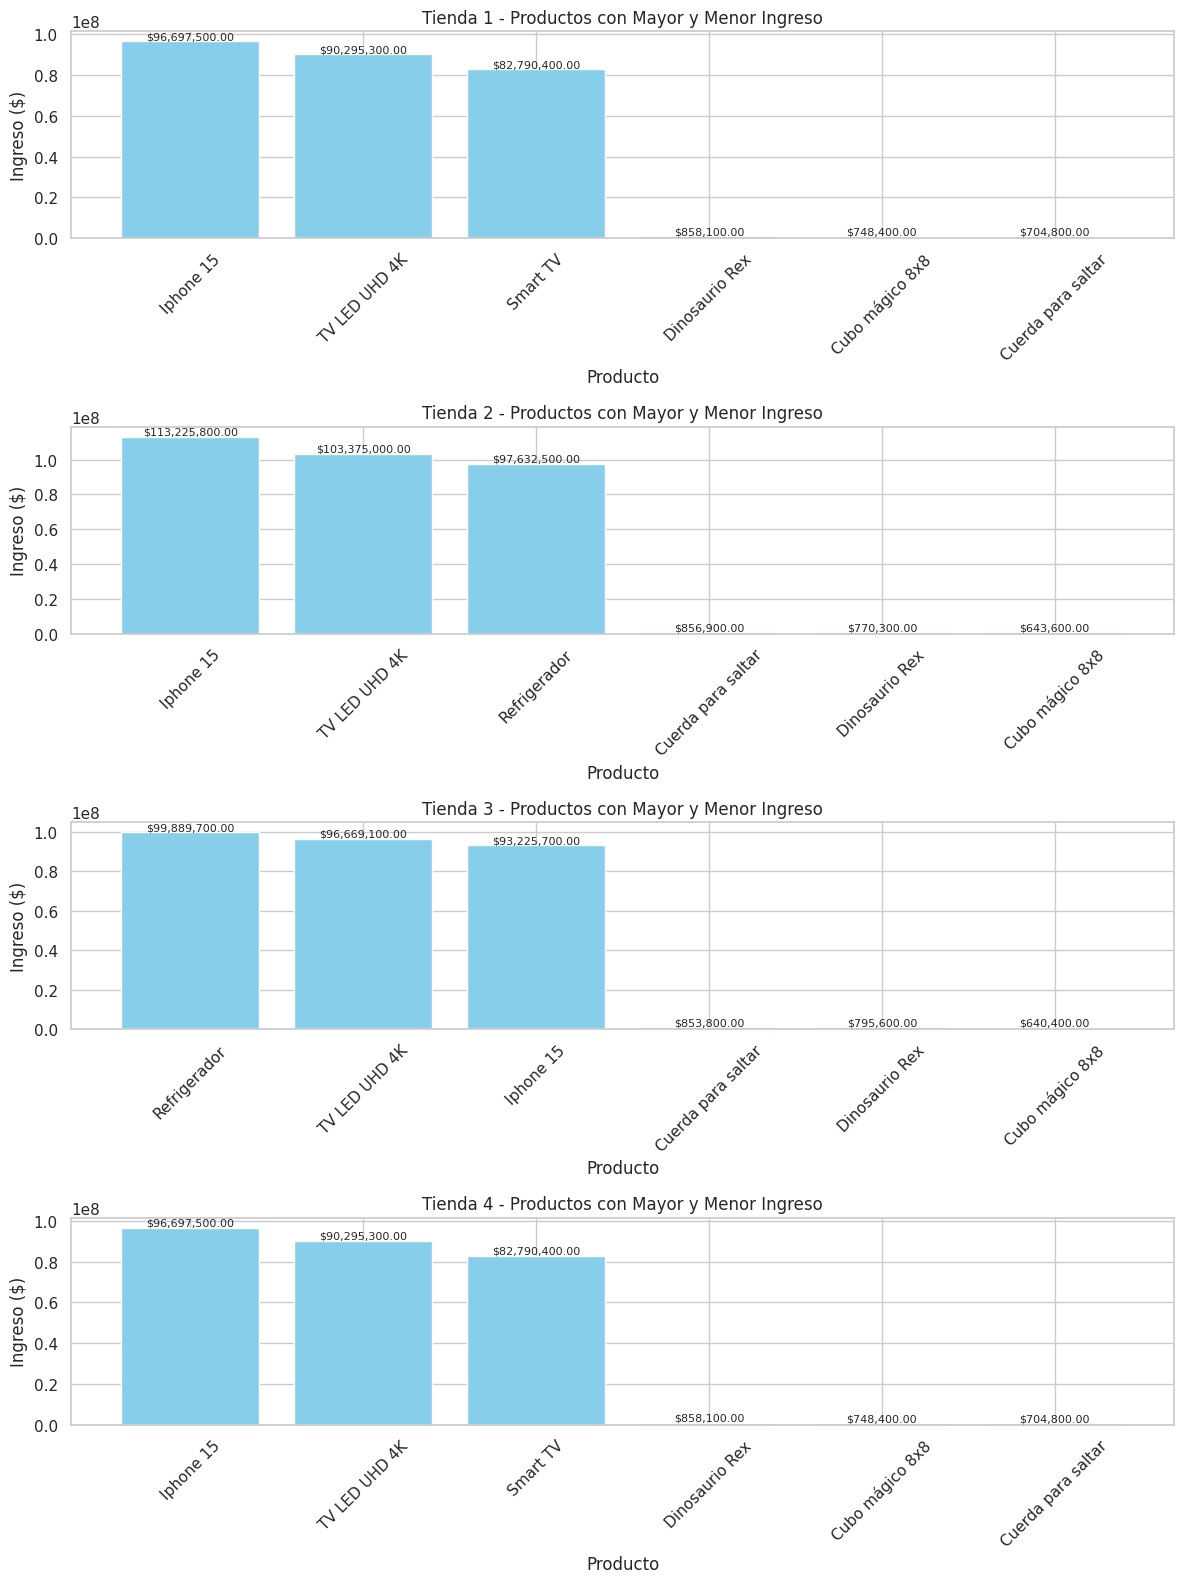

In [ ]:
urls = [url, url2, url3, url4]

# Función para leer CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Diccionario para almacenar resultados
resultados_por_tienda = {}

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    ingreso_por_producto = defaultdict(float)

    for venta in datos_tienda:
        producto = venta['Producto']
        precio = float(venta['Precio'])
        ingreso_por_producto[producto] += precio

    productos_ordenados = sorted(ingreso_por_producto.items(), key=lambda x: x[1], reverse=True)

    top_mas_vendidos = productos_ordenados[:3]
    top_menos_vendidos = productos_ordenados[-3:]

    resultados_por_tienda[f"Tienda {i}"] = {
        'mas_vendidos': top_mas_vendidos,
        'menos_vendidos': top_menos_vendidos
    }

# Gráficos de barras verticales
fig, axes = plt.subplots(4, 1, figsize=(12, 16))  # 4 filas, 1 columna
axes = axes.flatten()

for i, (tienda_nombre, resultados) in enumerate(resultados_por_tienda.items()):
    mas_vendidos = resultados['mas_vendidos']
    menos_vendidos = resultados['menos_vendidos']

    productos_combinados = [item[0] for item in mas_vendidos] + [item[0] for item in menos_vendidos]
    ingresos_combinados = [item[1] for item in mas_vendidos] + [item[1] for item in menos_vendidos]

    colores = ['skyblue'] * 3 + ['salmon'] * 3

    ax = axes[i]
    bars = ax.bar(productos_combinados, ingresos_combinados, color=colores)
    ax.set_title(f'{tienda_nombre} - Productos con Mayor y Menor Ingreso')
    ax.set_ylabel('Ingreso ($)')
    ax.set_xlabel('Producto')
    ax.tick_params(axis='x', rotation=45)

    # Etiquetas de ingreso sobre las barras con formato con comas
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 50,
            f'${height:,.2f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
tiendas = [pd.read_csv(url) for url in urls]
tienda1 = tiendas[0]
tienda2 = tiendas[1]
tienda3 = tiendas[2]
tienda4 = tiendas[3]

costo_envio_tienda1 = tienda1['Costo de envío'].mean()
costo_envio_tienda2 = tienda2['Costo de envío'].mean()
costo_envio_tienda3 = tienda3['Costo de envío'].mean()
costo_envio_tienda4 = tienda4['Costo de envío'].mean()

print(f"El costo de envío promedio de la tienda 1 es: ${costo_envio_tienda1:,.2f}")
print(f"El costo de envío promedio de la tienda 2 es: ${costo_envio_tienda2:,.2f}")
print(f"El costo de envío promedio de la tienda 3 es: ${costo_envio_tienda3:,.2f}")
print(f"El costo de envío promedio de la tienda 4 es: ${costo_envio_tienda4:,.2f}")


El costo de envío promedio de la tienda 1 es: $23,459.46
El costo de envío promedio de la tienda 2 es: $25,216.24
El costo de envío promedio de la tienda 3 es: $24,805.68
El costo de envío promedio de la tienda 4 es: $23,459.46


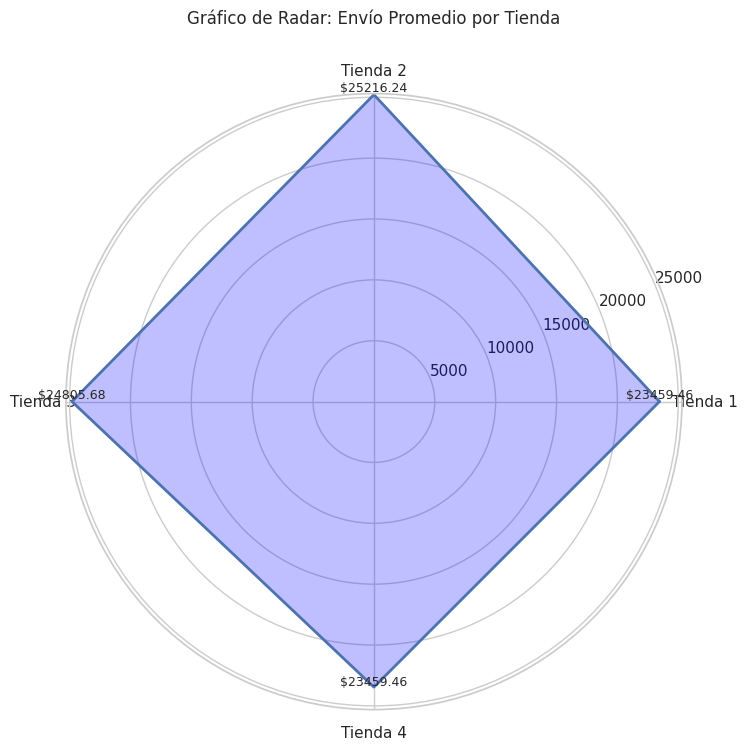

In [ ]:
urls = [url, url2, url3, url4]

# Función para leer un CSV desde URL
def leer_csv(url):
    datos = []
    with urlopen(url) as respuesta:
        lineas = respuesta.read().decode('utf-8').splitlines()
        lector = csv.DictReader(lineas)
        for fila in lector:
            datos.append(fila)
    return datos

# Calcular envíos promedio y almacenarlos
envios_promedio = []
nombres_tiendas = []

for i, url in enumerate(urls, start=1):
    datos_tienda = leer_csv(url)
    costos_envio = []

    for venta in datos_tienda:
        costo_envio = float(venta['Costo de envío'])
        costos_envio.append(costo_envio)

    promedio_envio = sum(costos_envio) / len(costos_envio) if costos_envio else 0
    envios_promedio.append(promedio_envio)
    nombres_tiendas.append(f'Tienda {i}')

# --- Configuración para el Gráfico de Radar ---

num_vars = len(nombres_tiendas)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Para que el gráfico se cierre, repetimos el primer valor y ángulo
envios_promedio_cerrado = envios_promedio + [envios_promedio[0]]
angles_cerrado = angles + [angles[0]]

# --- Crear el Gráfico de Radar ---

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.plot(angles_cerrado, envios_promedio_cerrado, linewidth=2, linestyle='solid', label='Envío Promedio')
ax.fill(angles_cerrado, envios_promedio_cerrado, 'blue', alpha=0.25)

# Configurar las etiquetas de los ejes (nombres de las tiendas)
ax.set_thetagrids(np.degrees(angles), nombres_tiendas)

# Añadir etiquetas de valor a los puntos
# Iteramos sobre los ángulos y los valores de envío promedio
for angle, envio in zip(angles, envios_promedio):
    # ax.text(angle, radius, text, **kwargs)
    # angle: Posición angular en radianes
    # radius: Posición radial (distancia desde el centro). Ajustamos ligeramente para que no se superponga.
    ax.text(angle, envio + 50, f'${envio:.2f}', ha='center', va='bottom', fontsize=9) # Ajusta 50 según necesites espacio

# Añadir título
ax.set_title('Gráfico de Radar: Envío Promedio por Tienda', y=1.1)

# Opcional: Ajustar los límites del eje radial si es necesario
# ax.set_ylim(0, max(envios_promedio) * 1.2) # Ajusta el límite máximo

plt.show()


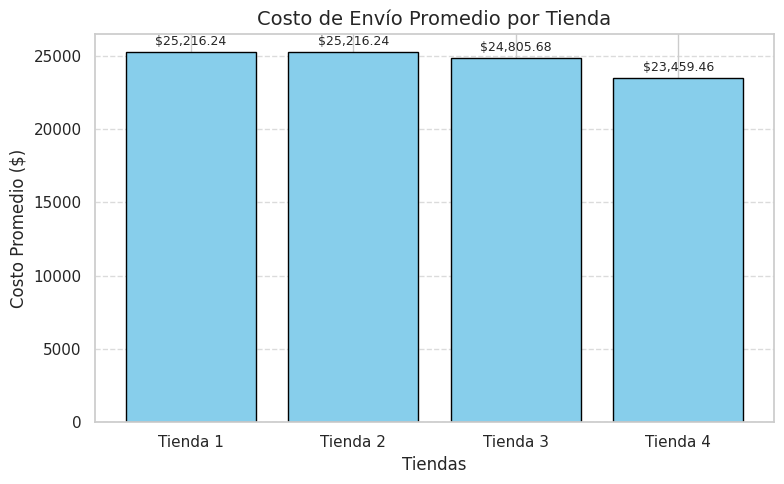

In [ ]:

# Nombres de las tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Costos promedio (puedes reemplazarlos con tus variables)
envios_promedio = [25216.24, 25216.24, 24805.68, 23459.46]

# Crear gráfico de barras
plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, envios_promedio, color='skyblue', edgecolor='black')

# Añadir etiquetas de valor sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 300, f'${yval:,.2f}', ha='center', va='bottom', fontsize=9)

# Títulos y etiquetas
plt.title('Costo de Envío Promedio por Tienda', fontsize=14)
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#Generando Graficos


Generamos los graficos que vemos mas necesarios, incluyendo el de geografia

##Grafico de dispersion

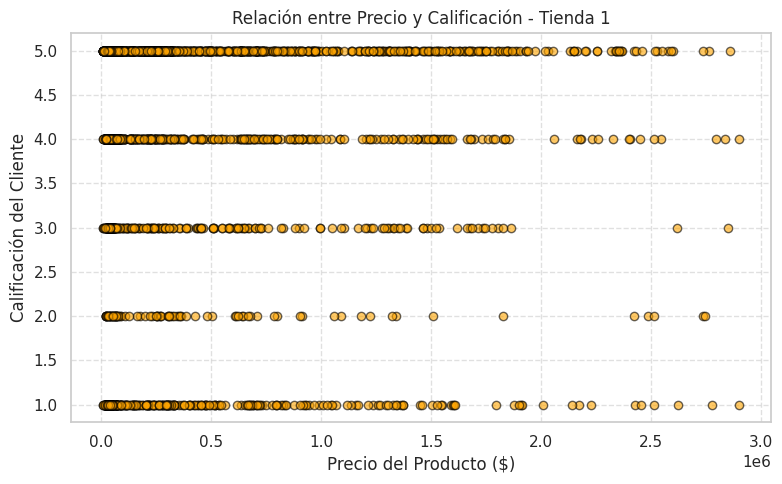

In [ ]:
# Convertimos columnas necesarias a tipo numérico
tienda1['Precio'] = pd.to_numeric(tienda1['Precio'], errors='coerce')
tienda1['Calificación'] = pd.to_numeric(tienda1['Calificación'], errors='coerce')

# Creamos el gráfico
plt.figure(figsize=(8, 5))
plt.scatter(tienda1['Precio'], tienda1['Calificación'], alpha=0.6, c='orange', edgecolors='black')

plt.title('Relación entre Precio y Calificación - Tienda 1')
plt.xlabel('Precio del Producto ($)')
plt.ylabel('Calificación del Cliente')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##Grafico de Linea

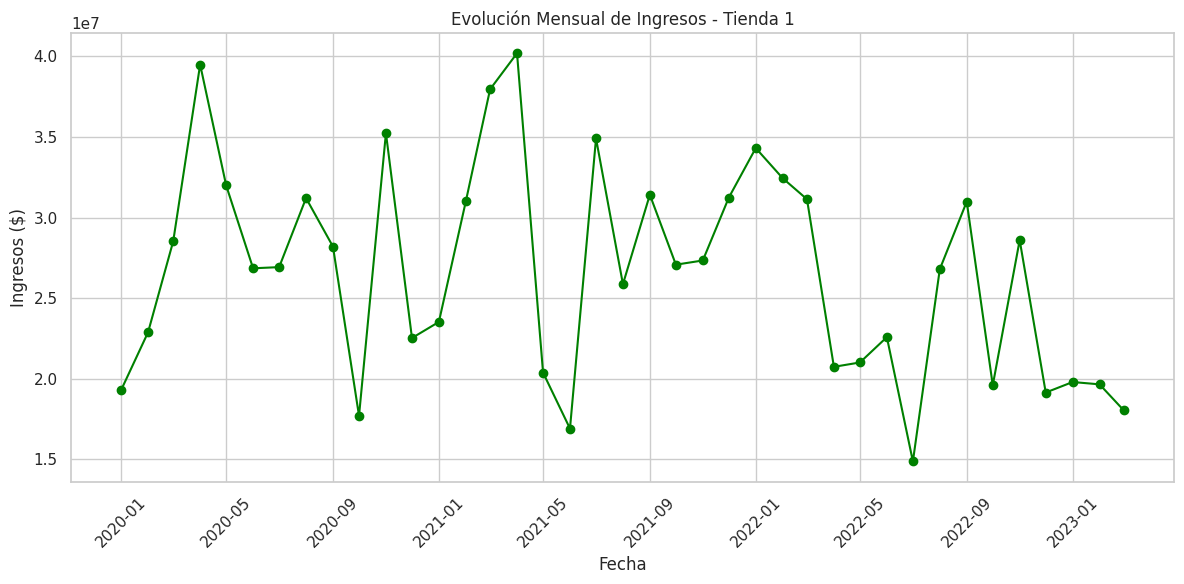

In [ ]:
# Agrupar por mes y sumar ingresos
tienda1['Fecha de Compra'] = pd.to_datetime(tienda1['Fecha de Compra'], dayfirst=True)
tienda1['Precio'] = pd.to_numeric(tienda1['Precio'], errors='coerce')

ingresos_mensuales = tienda1.groupby(tienda1['Fecha de Compra'].dt.to_period('M'))['Precio'].sum()
ingresos_mensuales.index = ingresos_mensuales.index.to_timestamp()

# Gráfico más limpio
plt.figure(figsize=(12, 6))
plt.plot(ingresos_mensuales.index, ingresos_mensuales.values, color='green', marker='o')
plt.title('Evolución Mensual de Ingresos - Tienda 1')
plt.xlabel('Fecha')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

##Mapa geografico

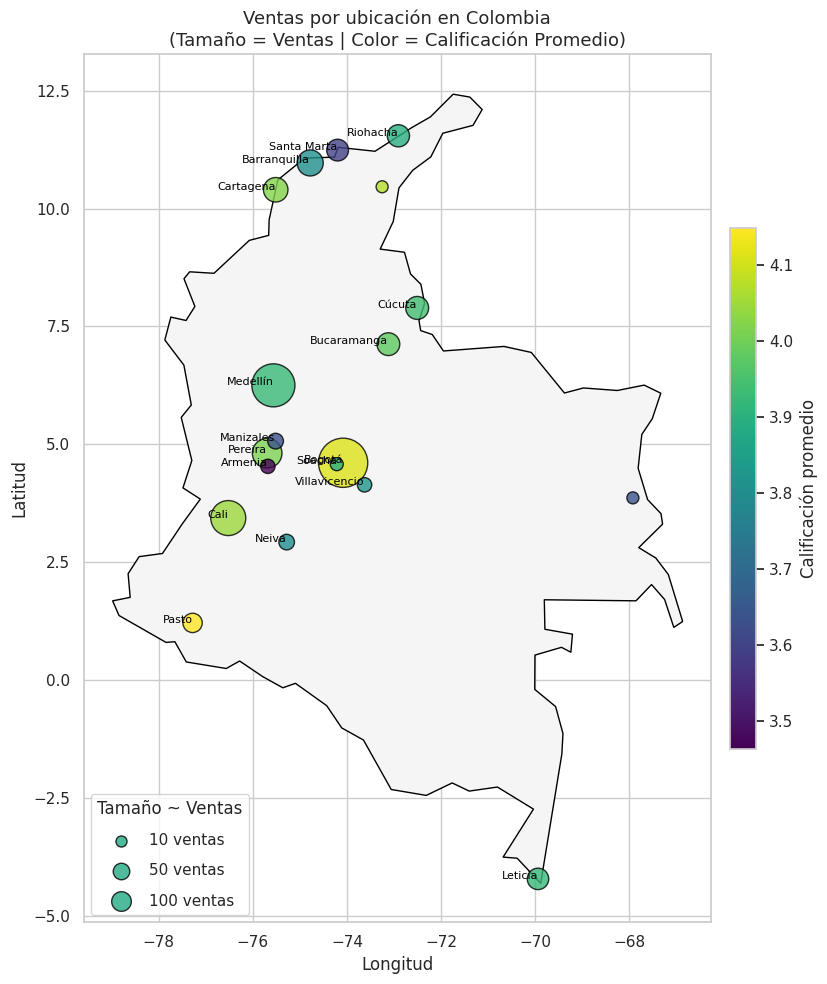

In [ ]:
# Cargar datos
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Unir todos los datos
df_total = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por ciudad y coordenadas
agrupado = df_total.groupby(['lat', 'lon', 'Lugar de Compra']).agg({
    'Producto': 'count',
    'Calificación': 'mean'
}).reset_index().rename(columns={'Producto': 'Ventas', 'Calificación': 'Calificacion_Prom'})

# Crear geometría
geometry = [Point(xy) for xy in zip(agrupado['lon'], agrupado['lat'])]
ventas_geo = gpd.GeoDataFrame(agrupado, geometry=geometry, crs="EPSG:4326")

# Cargar mapa base de Colombia
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
colombia = world[world['ADMIN'] == "Colombia"]

# Ordenar por tamaño de ventas para mejor visualización
ventas_geo = ventas_geo.sort_values(by='Ventas', ascending=False)

# Escalar tamaño de las burbujas
ventas_geo['size'] = np.sqrt(ventas_geo['Ventas']) * 20

# Mapeo de color por calificación
colores = plt.cm.viridis
norm = plt.Normalize(ventas_geo['Calificacion_Prom'].min(), ventas_geo['Calificacion_Prom'].max())
colores_mapeados = colores(norm(ventas_geo['Calificacion_Prom']))

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, color='whitesmoke', edgecolor='black')

# Plot principal con burbujas coloreadas por calificación
ventas_geo.plot(
    ax=ax,
    markersize=ventas_geo['size'],
    color=colores_mapeados,
    alpha=0.8,
    edgecolor='black'
)

# Etiquetas para ciudades con muchas ventas
for x, y, label, v in zip(ventas_geo.geometry.x, ventas_geo.geometry.y, ventas_geo['Lugar de Compra'], ventas_geo['Ventas']):
    if v >= 15:
        ax.text(x, y, label, fontsize=8, ha='right', color='black')

# Leyenda de tamaños (usar mismo color base)
for ventas in [10, 50, 100]:
    size = np.sqrt(ventas) * 20
    ax.scatter([], [], s=size, color=colores(norm(ventas_geo['Calificacion_Prom'].mean())), edgecolor='black',
               alpha=0.8, label=f'{ventas} ventas')

# Leyenda de color (calificación)
sm = plt.cm.ScalarMappable(cmap=colores, norm=norm)
sm._A = []
cbar = fig.colorbar(sm, ax=ax, shrink=0.6, pad=0.02)
cbar.set_label('Calificación promedio')

# Mostrar leyenda de tamaño
ax.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Tamaño ~ Ventas', loc='lower left')

# Títulos
plt.title("Ventas por ubicación en Colombia\n(Tamaño = Ventas | Color = Calificación Promedio)", fontsize=13)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

#CONCLUSION E INFORME FINAL

###El objetivo de este análisis es identificar cuál de las cuatro tiendas virtuales del Sr. Juan presenta el rendimiento más bajo, con el fin de tomar una decisión informada sobre cuál de ellas podría ser vendida. Para ello, se evaluaron diversos factores clave: ingresos totales, categorías y productos más/menos vendidos, calificaciones promedio de los clientes, costos de envío y ubicación geográfica de las ventas.

# Resumen de Hallazgos

A continuación, se resumen los principales hallazgos obtenidos a partir de los gráficos y el procesamiento de datos:

---

#### **1. Ingresos Totales**
- La **Tienda 1** lidera en ingresos, lo que la convierte en la más rentable.
- La **Tienda 4** presenta los ingresos más bajos.

---

#### **2. Categorías Más y Menos Vendidas**
- En general, las categorías relacionadas con **tecnología y hogar** se venden más.
- En la **Tienda 4**, se observa poca rotación en varias categorías, lo que refleja **bajo dinamismo comercial**.

---

#### **3. Calificaciones Promedio**
- La **Tienda 2** tiene la **mejor calificación** por parte de los clientes.
- La **Tienda 3** presenta las **calificaciones más bajas**.
- La **Tienda 4** tiene una **calificación promedio**, lo que indica una experiencia **aceptable** para los compradores.

---

#### **4. Productos Más y Menos Vendidos**
- Las **Tiendas 1 y 2** concentran los productos más vendidos.
- La **Tienda 4** tiene un menor número de unidades vendidas por producto.

---

#### **5. Coste de Envío Promedio**
- Las diferencias entre tiendas no son muy significativas.
- Sin embargo, la **Tienda 1** logra **mejores ingresos** a pesar de tener **costos de envío moderados**.

---

#### **6. Distribución Geográfica de las Ventas**
- La **Tienda 1** tiene **mayor presencia** en zonas con alta demanda.
- La **Tienda 4** presenta **baja concentración de ventas**, dispersas geográficamente, lo que podría dificultar su logística.

---

# Conclusión y Recomendación

Tras evaluar todas las variables, se recomienda considerar la **venta de la Tienda 4**. Aunque su calificación es aceptable, su **bajo ingreso**, **menor volumen de ventas** y **presencia limitada en zonas clave** la posicionan como la **menos competitiva**.

Sin embargo, esta decisión debe tomarse con base en los **objetivos estratégicos del Sr. Juan**. Si se busca **reducir operaciones** sin afectar significativamente los ingresos ni la imagen, la **Tienda 4** es la candidata más lógica. Pero si se desea **mejorar la experiencia del cliente**, podría evaluarse también una intervención en la **Tienda 3**, que presenta **bajas calificaciones**.

Se sugiere complementar esta decisión con un **análisis financiero más detallado** y una **estrategia de reubicación o refuerzo comercial** si se desea mantener las tiendas restantes.

